# Code stuff - not slides!

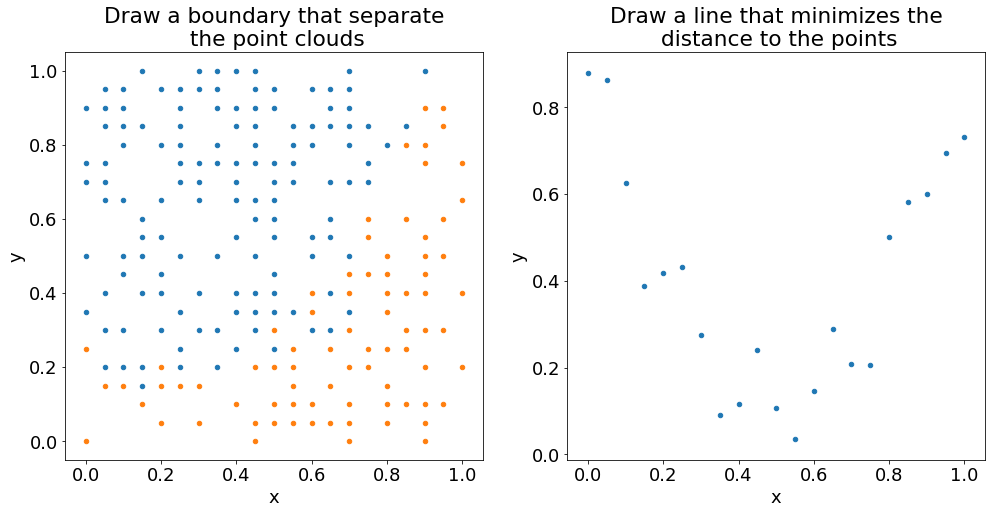

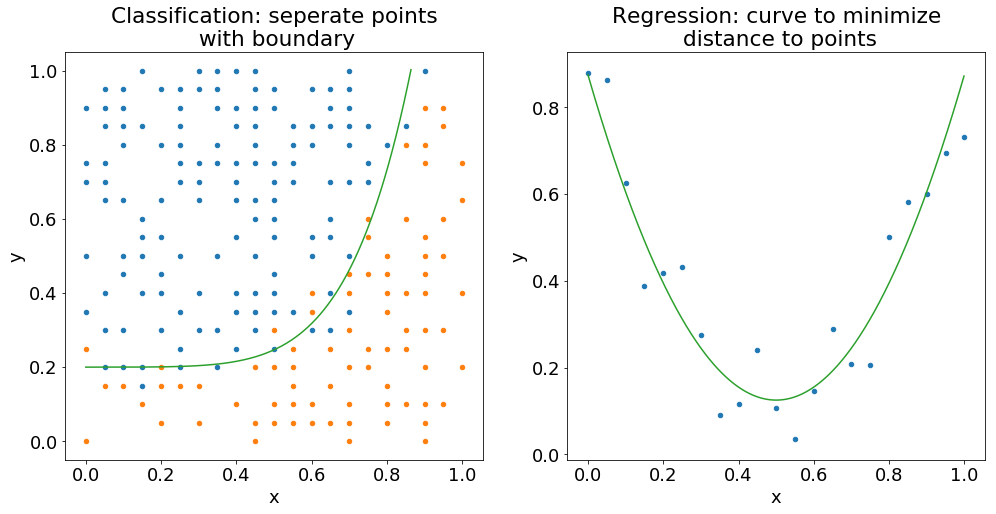

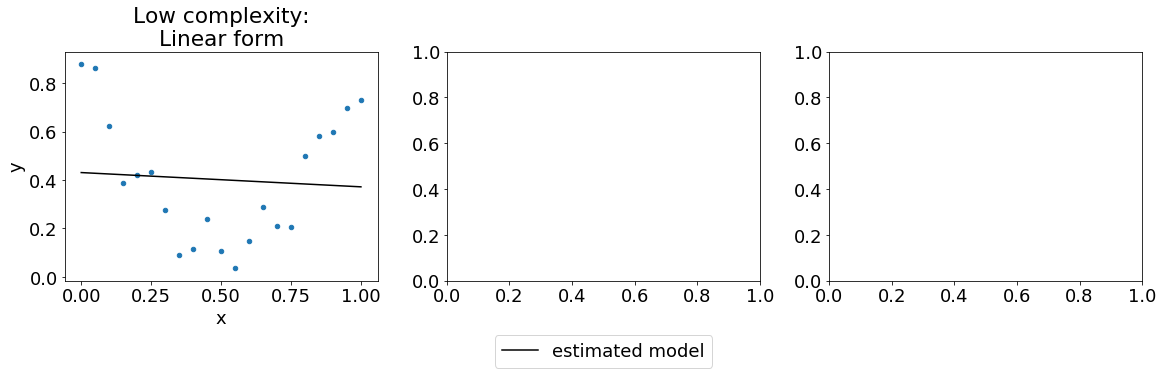

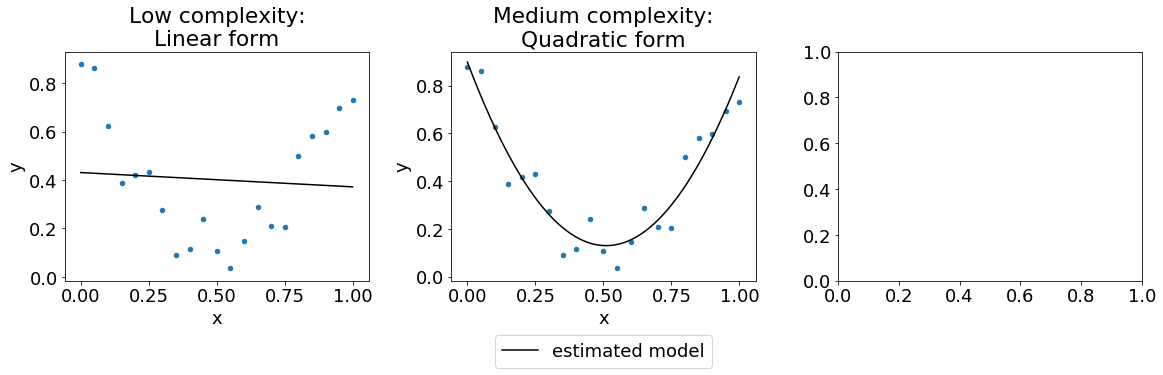

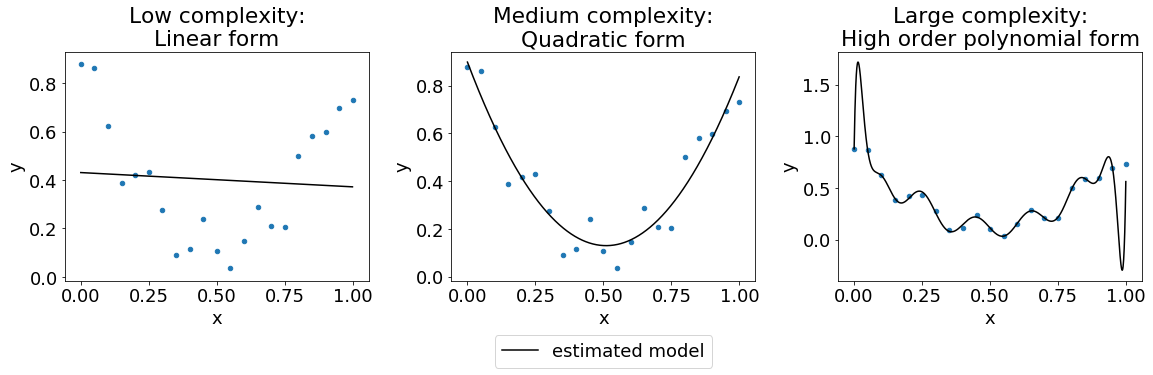

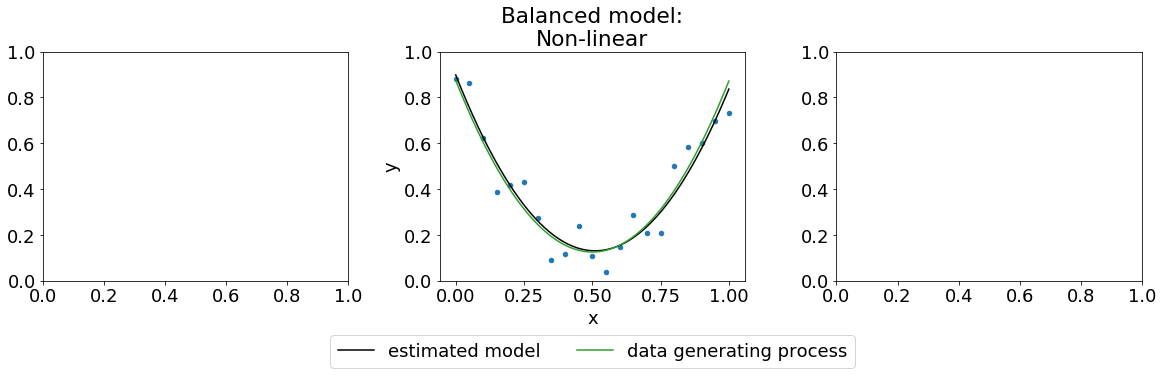

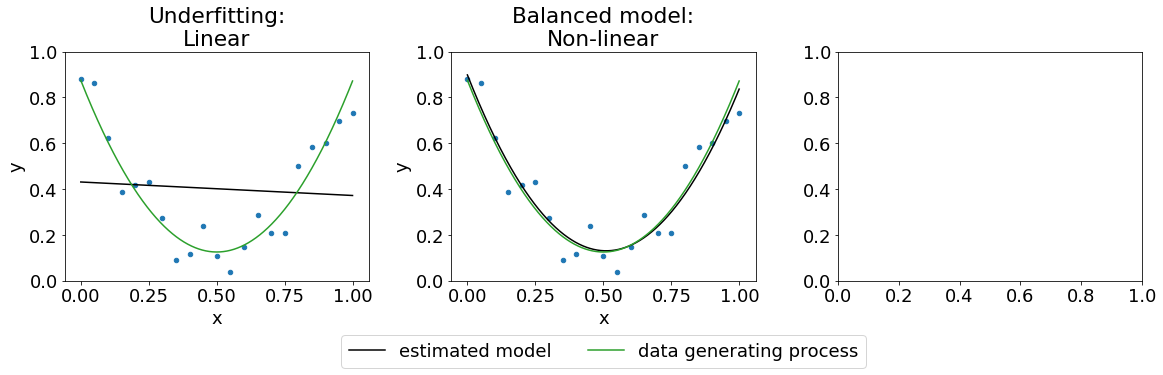

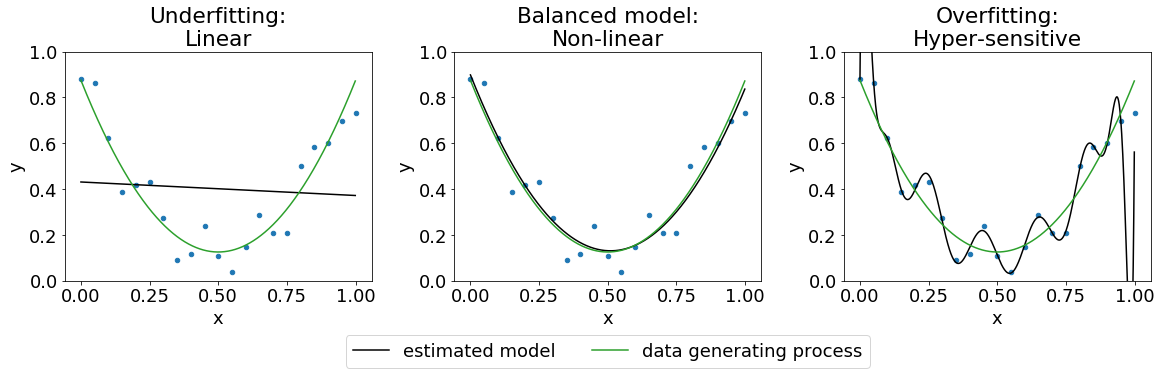

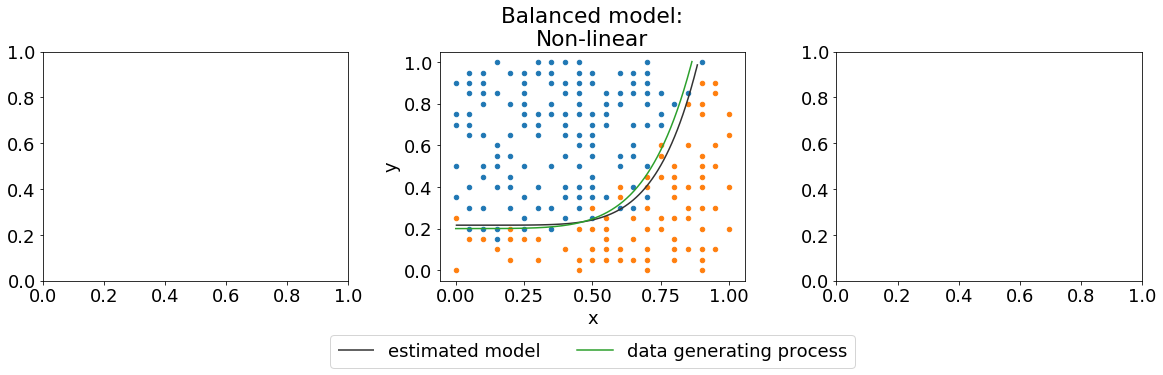

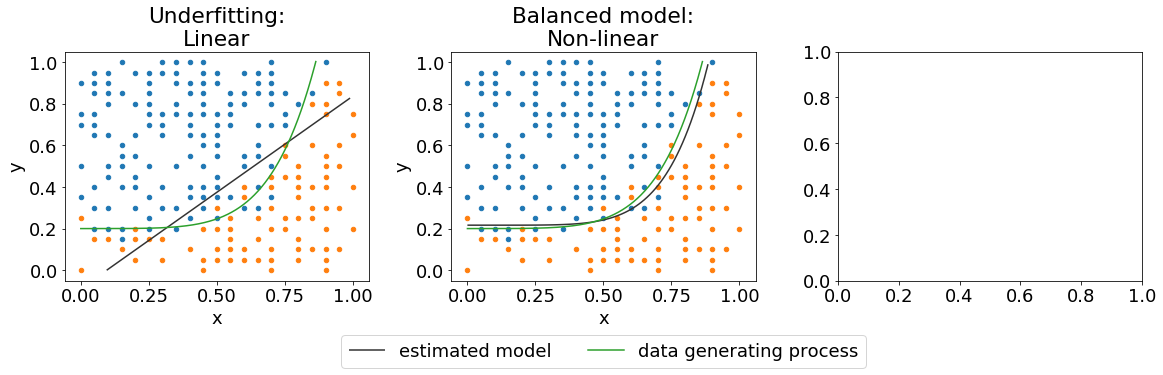

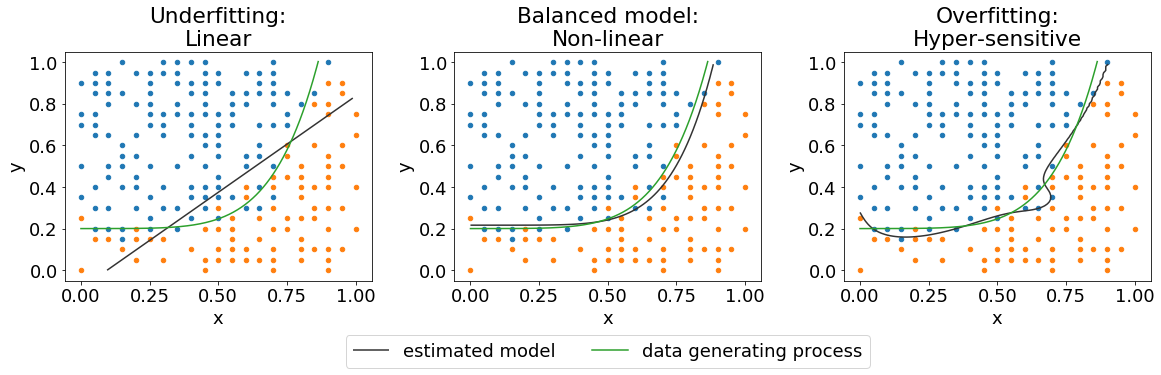

In [1]:
%run ../ML_plots.ipynb

# Session 12:
## Supervised learning, part 1

*Andreas Bjerre-Nielsen*

## Agenda
1. [Modelling data](#Modelling-data)
1. [A familiar regression model](#A-familiar-regression-model)
1. [The curse of overfitting](#The-curse-of-overfitting)
1. [Important details](#Implementation-details)

## Vaaaamos

In [18]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

plt.style.use('default') # set style (colors, background, size, gridlines etc.)
plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

## Supervised problems (1)
*How do we distinguish between problems?*

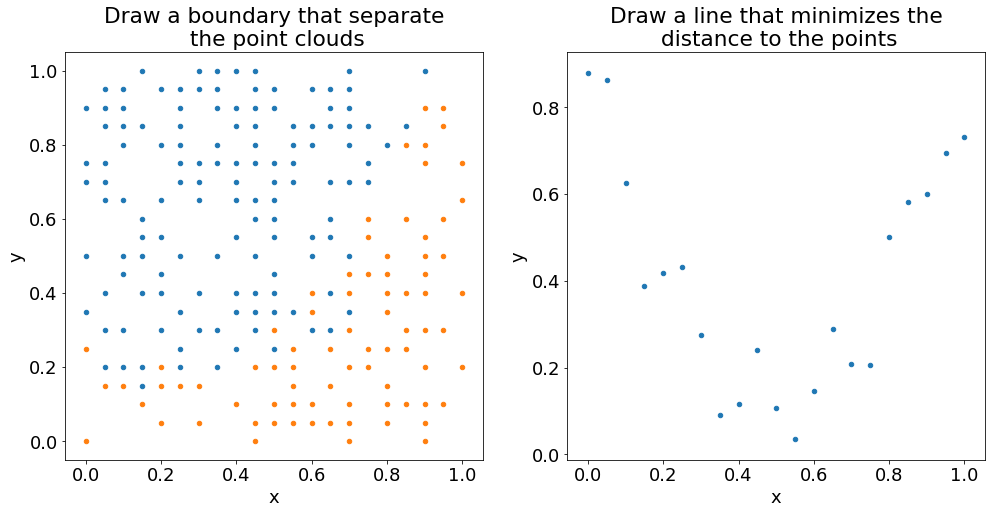

In [19]:
f_identify_question

## Supervised problems (2)
*The two canonical problems*

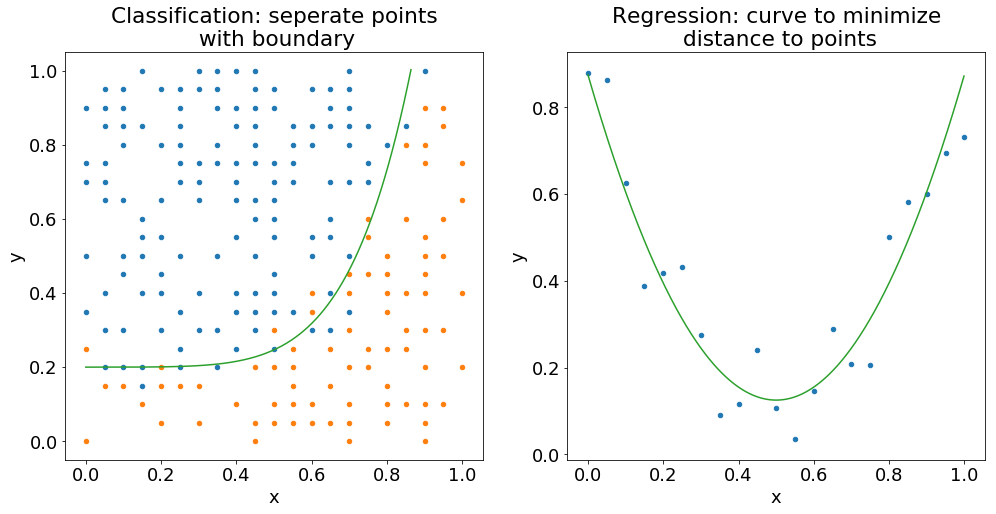

In [20]:
f_identify_answer

## Supervised problems (3)
*Which models have we seen for classification?*

- .

- .

- .

# Modelling data

## Model complexity (1)
*What does a model of low complexity look like?*

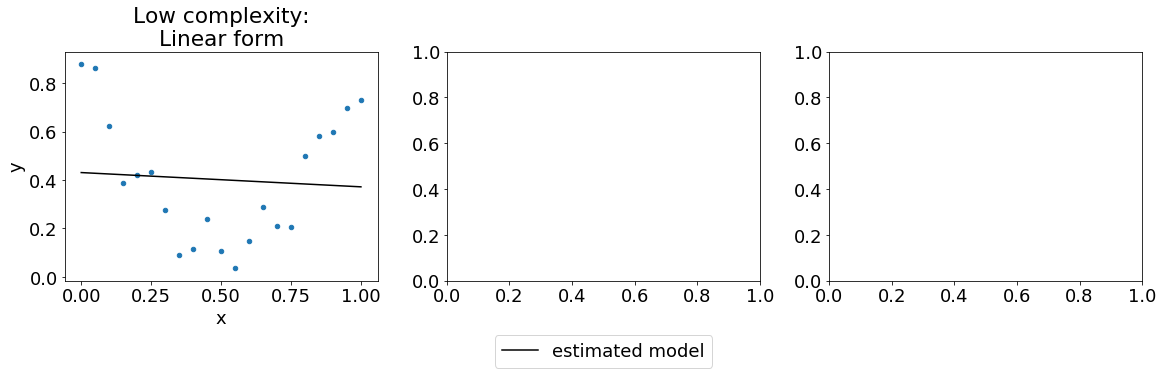

In [21]:
f_complexity[0]

## Model complexity (2)
*What does medium model complexity look like?*

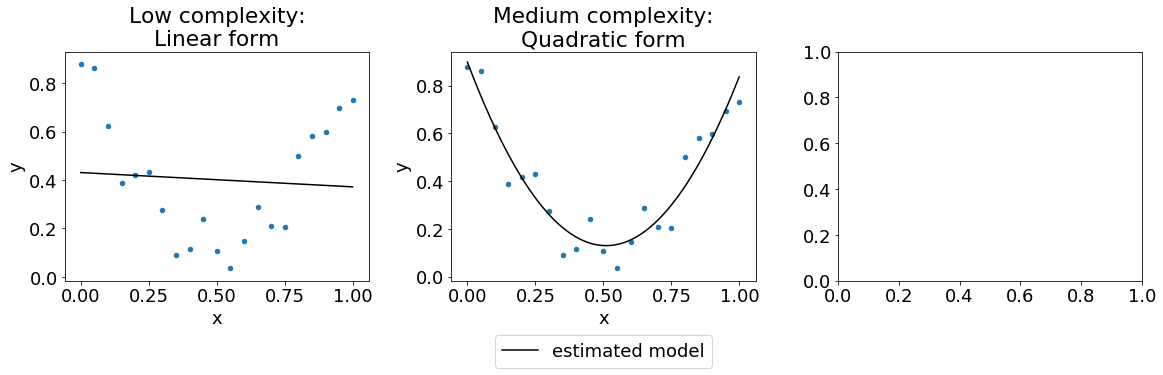

In [22]:
f_complexity[1]

## Model complexity (3)
*What does high model complexity look like?*

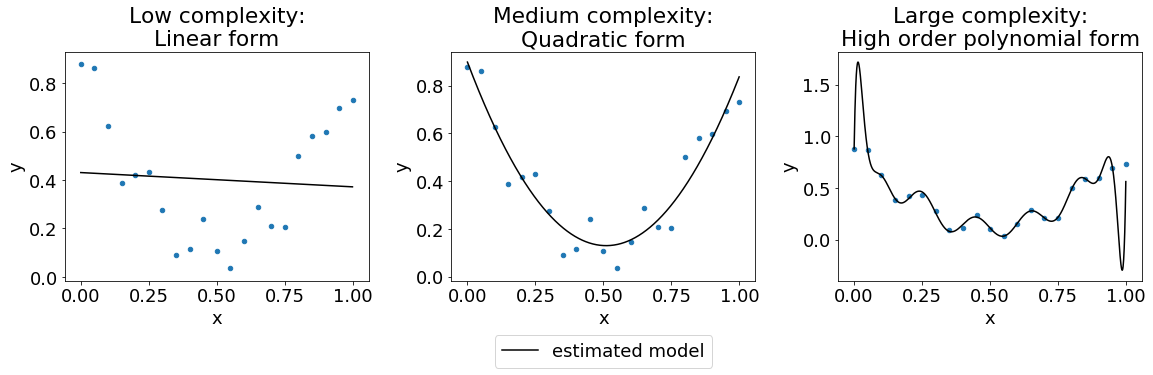

In [23]:
f_complexity[2]

## Model fitting (1)
*Quiz (1 min.): Which model fitted the data best?*

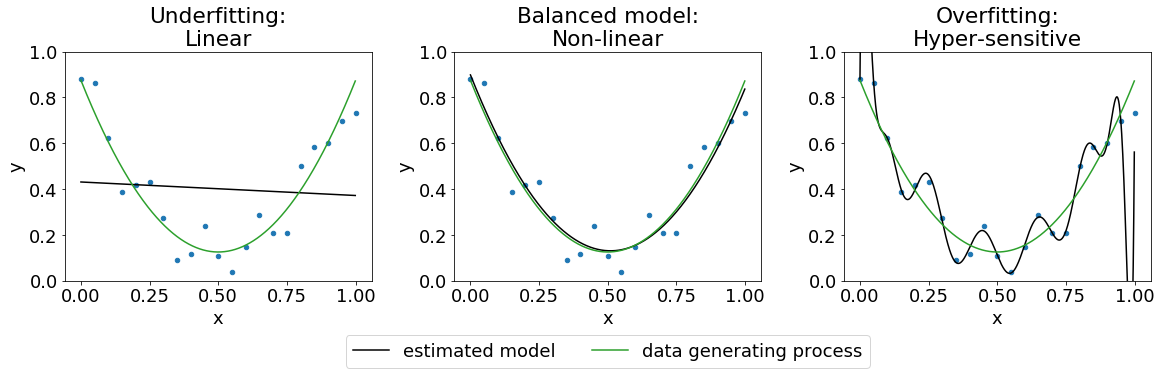

In [24]:
f_bias_var['regression'][2]

## Model fitting (2)
*What does underfitting and overfitting look like for classification?*

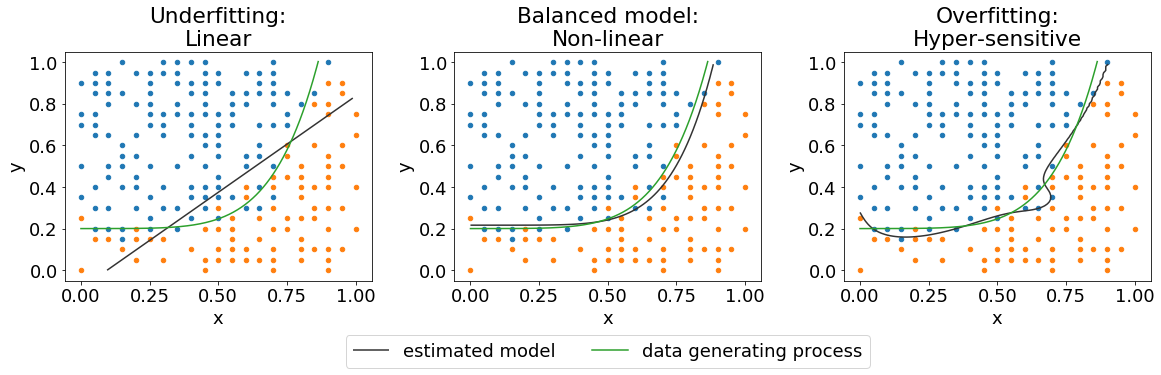

In [25]:
f_bias_var['classification'][2]

## Two agendas (1)

What are the objectives of empirical research? 

1. *causation*: what is the effect of a particular variable on an outcome? 
2. *prediction*: find some function that provides a good prediction of $y$ as a function of $x$

## Two agendas (2)

How might we express the agendas in a model?

$$ y = \alpha + \beta x + \varepsilon $$

- *causation*: interested in $\hat{\beta}$ 

- *prediction*: interested in $\hat{y}$ 


## Two agendas (3)

Might these two agendas be related at a deeper level? Can prediction quality inform us about how to make causal models?

# A familiar regression model

## Estimation (1)
*Do we know already some ways to estimate regression models?*

- Social scientists know all about the Ordinary Least Squares (OLS).
    - OLS estimate both parameters and their standard deviation.
    - Is best linear unbiased estimator under regularity conditions.     
    

*How is OLS estimated?*

- $\beta=(\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$
- computation requires non perfect multicollinarity.

## Estimation (2)
*How might we estimate a linear regression model?*

- first order method (e.g. gradient descent)
- second order method (e.g. Newton-Raphson)

*So what the hell was gradient descent?*

- compute errors, multiply with features and update

## Estimation (3)
*Can you explain that in details?*

- Yes, like with Adaline, we minimize the sum of squared errors (SSE): 
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

In [26]:
X = np.random.normal(size=(3,2))
y = np.random.normal(size=(3))
w = np.random.normal(size=(3))

e = y-(w[0]+X.dot(w[1:]))
SSE = e.T.dot(e)

## Estimation (4)
*And what about the updating..? What is it something about the first order deritative?*

\begin{align}
\frac{\partial SSE}{\partial\hat{w}}=&\textbf{X}^T\textbf{e},\\
 \Delta\hat{w}=&\eta\cdot\textbf{X}^T\textbf{e}=\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})
\end{align}

In [27]:
eta = 0.001 # learning rate
fod = X.T.dot(e)
update_vars = eta*fod
update_bias = eta*e.sum()

## Estimation (5)
*What might some advantages be relative to OLS?*

- Works despite high multicollinarity
- Speed
    - OLS has $\mathcal{O}(K^2N)$ computation time ([read more](https://math.stackexchange.com/questions/84495/computational-complexity-of-least-square-regression-operation))
        - Quadratic scaling in number of variables ($K$).
    - Stochastic gradient descent
        - Likely to converge faster with many observations ($N$)

## Fitting a polynomial (1)
Polyonomial: $f(x) = 2+8*x^4$

Try models of increasing order polynomials. 

- Split data into train and test (50/50)


- For polynomial order 0 to 9:
    - Iteration n: $y = \sum_{k=0}^{n}(\beta_k\cdot x^k)+\varepsilon$.
    - Estimate order n model on training data
    - Evaluate with on test data with RMSE: 
        - $log RMSE = \log (\sqrt{MSE})$     

## Fitting a polynomial (2)
We generate samples of data from true model.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fct(X):
    return 2+X**4

n_samples = 25
n_degrees = 15

np.random.seed(0)

X_train = np.random.normal(size=(n_samples,1))
y_train = true_fct(X_train).reshape(-1) + np.random.randn(n_samples) 

X_test = np.random.normal(size=(n_samples,1))
y_test = true_fct(X_test).reshape(-1) + np.random.randn(n_samples)

## Fitting a polynomial (3)
We estimate the polynomials

In [29]:
from sklearn.metrics import mean_squared_error as mse

test_mse = []
train_mse = []
parameters = []
degrees = range(n_degrees+1)

for p in degrees:
    X_train_p = PolynomialFeatures(degree=p).fit_transform(X_train)
    X_test_p = PolynomialFeatures(degree=p).fit_transform(X_train)
    reg = LinearRegression().fit(X_train_p, y_train)
    train_mse += [mse(reg.predict(X_train_p),y_train)] 
    test_mse += [mse(reg.predict(X_test_p),y_test)]     
    parameters.append(reg.coef_)

## Fitting a polynomial (4)
*So what happens to the model performance in- and out-of-sample?*

Text(0,0.5,'Mean squared error')

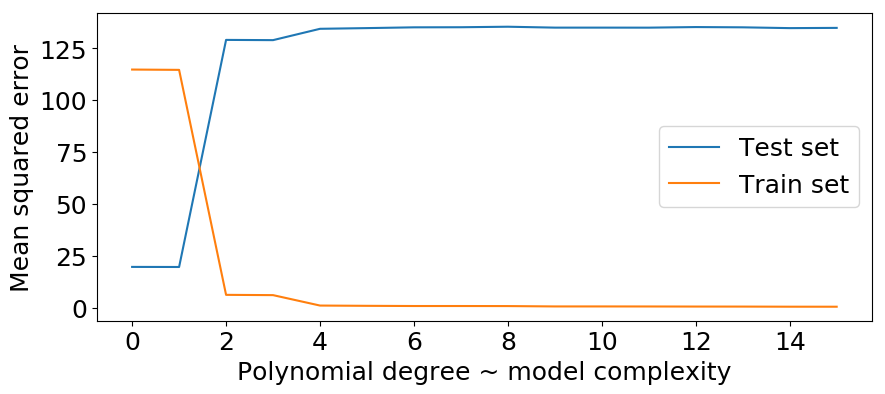

In [30]:
degree_index = pd.Index(degrees,name='Polynomial degree ~ model complexity')
ax = pd.DataFrame({'Train set':train_mse, 'Test set':test_mse})\
    .set_index(degree_index)\
    .plot(figsize=(10,4))
ax.set_ylabel('Mean squared error')

## Fitting a polynomial (4)
*Why does it go wrong?*
- more spurious parameters
- the coefficient size increases

## Fitting a polynomial (5)
*What do you mean coefficient size increase?*

Text(0,0.5,'Mean parameter size')

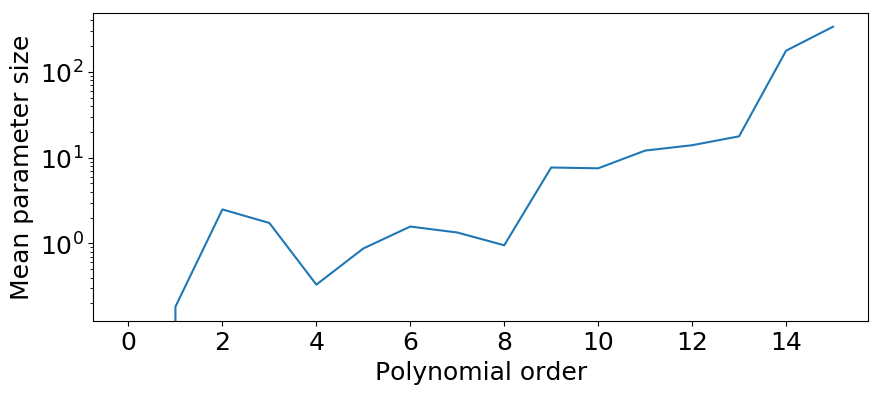

In [31]:
order_idx = pd.Index(range(n_degrees+1),name='Polynomial order')
ax = pd.DataFrame(parameters,index=order_idx)\
.abs().mean(1)\
.plot(logy=True)
ax.set_ylabel('Mean parameter size')

## Fitting a polynomial (6)
*How else could we visualize this problem?*

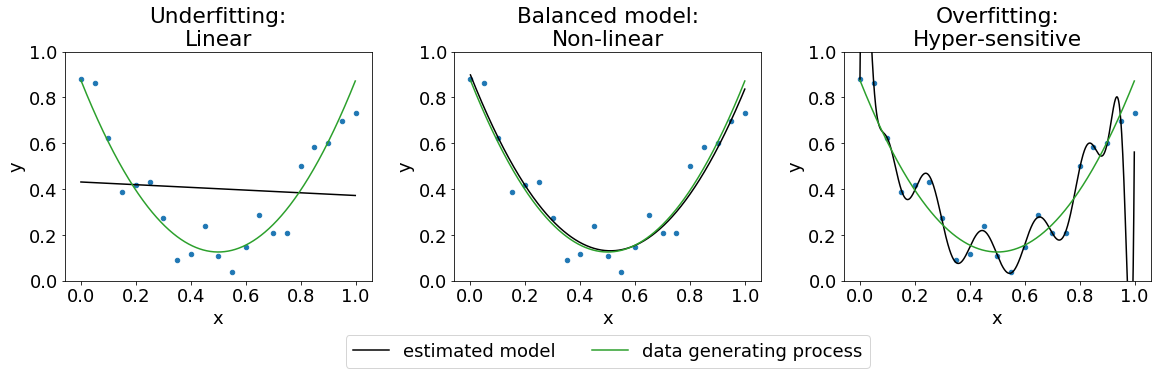

In [16]:
f_bias_var['regression'][2]

# The curse of overfitting

## Looking for a remedy
*How might we solve the overfitting problem?*

- .
- .

## Regularization (1)

*Why do we regularize?*

- To mitigate overfitting > better model predictions

*How do we regularize?*

- We make models which are less complex:
  - reducing the **number** of coefficient;
  - reducing the **size** of the coefficients.

## Regularization (2)

*What does regularization look like?*

We add a penalty term our optimization procedure:
    
$$ \text{arg min}_\beta \, \underset{\text{MSE}}{\underbrace{E[(y_0 - \hat{f}(x_0))^2]}} + \underset{\text{penalty}}{\underbrace{\lambda \cdot R(\beta)}}$$

Introduction of penalties implies that increased model complexity has to be met with high increases precision of estimates.

## Regularization (3)

*What are some used penalty functions?*

The two most common penalty functions are L1 and L2 regularization.

- L1 regularization (***Lasso***): $R(\beta)=\sum_{j=1}^{p}|\beta_j|$ 
    - Makes coefficients sparse, i.e. selects variables by removing some (if $\lambda$ is high)
    
    
- L2 regularization (***Ridge***): $R(\beta)=\sum_{j=1}^{p}\beta_j^2$
    - Reduce coefficient size
    - Fast due to analytical solution
    
*To note:* The *Elastic Net* uses a combination of L1 and L2 regularization.

## Regularization (4)

*How the Lasso (L1 reg.) deviates from OLS*

<img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l1.png'>

## Regularization (5)

*How the Ridge regression (L2 reg.) deviates from OLS*

<img src='http://rasbt.github.io/mlxtend/user_guide/general_concepts/regularization-linear_files/l2.png'>

## Regularization (6)

*How might we describe the $\lambda$ of Lasso and Ridge?*

These are hyperparameters that we can optimize over. 

- More about this tomorrow.

# Implementation details

## The devils in the details (1)

*So we just run regularization?*

# NO

We need to rescale our features:
- convert to zero mean: 
- standardize to unit std: 

Compute in Python:
- option 1: `StandardScaler` in `sklearn` 
- option 2: `(X - np.mean(X)) / np.std(X)`



## The devils in the details (2)
*So we just scale our test and train?*

# NO

Fit to the distribution in the training data first, then rescale train and test! See more [here](https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i).

## The devils in the details (3)
*So we just rescale before using polynomial features?*

# NO

Otherwise the interacted varaibles are not gaussian distributed.

## The devils in the details (4)
*Does sklearn's `PolynomialFeatures` work for more than variable?*

# YES!

# The end
[Return to agenda](#Agenda)